In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 1000

df = pd.read_csv("mpls_crime_2017-2022.csv", encoding="utf-8")

In [ ]:
df.sample(n=5)

In [3]:
def cleanup_df(a_df):
    
    a_df = a_df.drop("neighborhoodCrimeStatisticsID", axis=1)
    a_df = a_df.loc[df["neighborhood"] != "Z_** NOT ASSIGNED **"]
    a_df = a_df.loc[df["neighborhood"] != "** NOT ASSIGNED **"]
    a_df["neighborhood"] = a_df["neighborhood"].replace("CARAG", "South Uptown")
    a_df["neighborhood"] = a_df["neighborhood"].replace("ECCO", "East Bde Maka Ska")
    a_df["neighborhood"] = a_df["neighborhood"].replace("WEST CALHOUN", "West Maka Ska")
    a_df["neighborhood"] = a_df.neighborhood.str.lower()
    a_df["neighborhood"] = a_df["neighborhood"].replace("stevens square - loring heights", "steven's square - loring heights")
    a_df["neighborhood"] = a_df["neighborhood"].replace("west calhoun", "west maka ska")
    
    return a_df
    

In [4]:
# Breakpoint

df = cleanup_df(df)
df = df.copy()
# df.sort_values(by="neighborhood")

In [ ]:
# 480 data points for each neighborhood, accounting for name changes!

# df.neighborhood.value_counts()



In [5]:
# Mpls Neighborhood "Communities"

CALHOUN_ISLES = ["bryn - mawr", "cedar - isles - dean", "east bde maka ska", "east isles", "kenwood", "lowry hill", \
                 "lowry hill east", "south uptown", "west maka ska"]

CAMDEN = ["camden industrial", "cleveland", "folwell", "humboldt industrial area", "lind - bohanon", "mckinley", \
          "shingle creek", "victory", "webber - camden"]

CENTRAL = ["downtown east", "downtown west", "elliot park", "loring park", "north loop", "steven's square - loring heights"]

LONGFELLOW = ["cooper", "hiawatha", "howe", "longfellow", "seward"]

NEAR_NORTH = ["harrison", "hawthorne", "jordan", "near - north", "sumner - glenwood", "willard - hay"]

NOKOMIS = ["diamond lake", "ericsson", "field", "hale", "keewaydin", "minnehaha", "morris park", \
           "northrop", "page", "regina", "wenonah"]

NORTHEAST = ["audubon park", "beltrami", "bottineau", "columbia park", "holland", "logan park", "marshall terrace", \
             "northeast park", "sheridan", "st. anthony east", "st. anthony west", "waite park", "windom park"]

PHILLIPS = ["east phillips", "midtown phillips", "phillips west", "ventura village"]

POWDERHORN = ["bancroft", "bryant", "central", "corcoran", "lyndale", "powderhorn park", "standish", "whittier"]
 
SOUTHWEST = ["armatage", "east harriet", "fulton", "kenny", "king field", "linden hills", "lynnhurst", "tangletown", \
             "windom"]

UNIVERSITY = ["cedar riverside", "como", "marcy holmes", "mid - city industrial", "nicollet island - east bank", \
              "prospect park - east river road", "university of minnesota"]

In [6]:
# Make list of communities names, each a list of neighborhoods

COMMUNITIES = ["CALHOUN_ISLES", "CAMDEN", "CENTRAL", "LONGFELLOW", "NEAR_NORTH", "NOKOMIS", "NORTHEAST", \
              "PHILLIPS", "POWDERHORN", "SOUTHWEST", "UNIVERSITY"]

In [7]:
# As per FBI ucr reporting standards

violent_crimes = ["Aggravated Assault", "Homicide", "Rape", "Robbery"]

property_crimes = ["Arson", "Auto Theft", "Burglary", "Larceny"]

In [8]:
# Narrow down to just months and type of crime I'm interested in

before_violent = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(violent_crimes)) ]
before_violent = before_violent.sort_values(by=["neighborhood", "ucrDescription"])

before_violent = before_violent.drop(["reportMonth", "reportYear"], axis=1)

before_violent["number"].describe()


count    348.000000
mean       0.876437
std        2.113281
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       17.000000
Name: number, dtype: float64

In [9]:
after_violent = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(violent_crimes)) ]
after_violent = after_violent.sort_values(by=["neighborhood", "ucrDescription"])

after_violent = after_violent.drop(["reportMonth", "reportYear"], axis=1)

after_violent["number"].describe()

count    348.000000
mean       1.293103
std        3.048174
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       25.000000
Name: number, dtype: float64

In [10]:
before_property = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(property_crimes)) ]
before_property = before_property.sort_values(by=["neighborhood", "ucrDescription"])

before_property = before_property.drop(["reportMonth", "reportYear"], axis=1)

before_property["number"].describe()

count    348.000000
mean       4.399425
std        6.533769
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       47.000000
Name: number, dtype: float64

In [11]:
after_property = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(property_crimes)) ]
after_property = after_property.sort_values(by=["neighborhood", "ucrDescription"])

after_property = after_property.drop(["reportMonth", "reportYear"], axis=1)

after_property["number"].describe()

count    348.000000
mean       4.482759
std        6.173499
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       43.000000
Name: number, dtype: float64

In [12]:
CALH_bp = int(before_property.loc[ (before_property["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_bp = int(before_property.loc[ (before_property["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_bp = int(before_property.loc[ (before_property["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_bp = int(before_property.loc[ (before_property["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_bp = int(before_property.loc[ (before_property["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_bp = int(before_property.loc[ (before_property["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_bp = int(before_property.loc[ (before_property["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_bp = int(before_property.loc[ (before_property["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_bp = int(before_property.loc[ (before_property["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_bp = int(before_property.loc[ (before_property["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_bp = int(before_property.loc[ (before_property["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [13]:
CALH_ap = int(after_property.loc[ (after_property["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_ap = int(after_property.loc[ (after_property["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_ap = int(after_property.loc[ (after_property["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_ap = int(after_property.loc[ (after_property["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_ap = int(after_property.loc[ (after_property["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_ap = int(after_property.loc[ (after_property["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_ap = int(after_property.loc[ (after_property["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_ap = int(after_property.loc[ (after_property["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_ap = int(after_property.loc[ (after_property["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_ap = int(after_property.loc[ (after_property["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_ap = int(after_property.loc[ (after_property["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [14]:
CALH_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [15]:
CALH_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [16]:
bp = [CALH_bp, CAMD_bp, CENT_bp, LONG_bp, NEAR_bp, NOKO_bp, NORT_bp, PHIL_bp, POWD_bp, SOUT_bp, UNIV_bp]
ap = [CALH_ap, CAMD_ap, CENT_ap, LONG_ap, NEAR_ap, NOKO_ap, NORT_ap, PHIL_ap, POWD_ap, SOUT_ap, UNIV_ap]

bv = [CALH_bv, CAMD_bv, CENT_bv, LONG_bv, NEAR_bv, NOKO_bv, NORT_bv, PHIL_bv, POWD_bv, SOUT_bv, UNIV_bv]
av = [CALH_av, CAMD_av, CENT_av, LONG_av, NEAR_av, NOKO_av, NORT_av, PHIL_av, POWD_av, SOUT_av, UNIV_av]

# COMMUNITIES is list of neighborhood communities for plotting

In [17]:
plot_df_prop = pd.DataFrame(index=COMMUNITIES, data={"Property_Before":bp, "Property_After":ap, "%_Chg": 0})
plot_df_viol = pd.DataFrame(index=COMMUNITIES, data={"Violent_Before":bv, "Violent_After":av, "%_Chg": 0})
   
plot_df_prop["%_Chg"] = ((plot_df_prop["Property_After"] - plot_df_prop["Property_Before"]) / plot_df_prop["Property_Before"]) * 100

plot_df_viol["%_Chg"] = ((plot_df_viol["Violent_After"] - plot_df_viol["Violent_Before"]) / plot_df_viol["Violent_Before"]) * 100



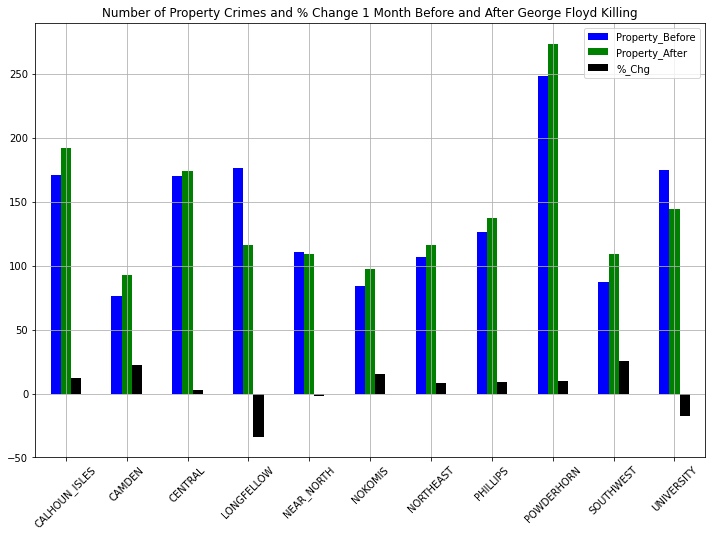

In [18]:
plot_df_prop.plot.bar(color=["blue","green","black"], figsize=(12,8))
plt.ylim(-50, 290)
plt.xticks(rotation=45)
plt.grid()
plt.title("Number of Property Crimes and % Change 1 Month Before and After George Floyd Killing")

plt.savefig("Property_Before_After.png")

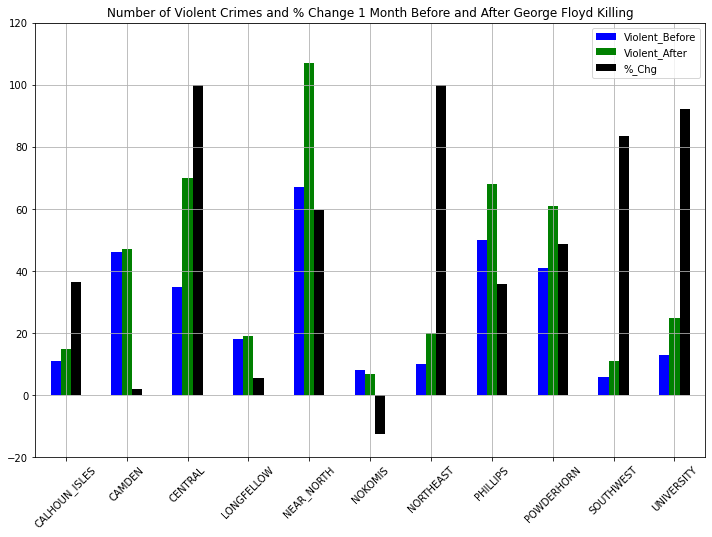

In [19]:
plot_df_viol.plot.bar(color=["blue","green","black"], figsize=(12,8))
plt.ylim(-20, 120)
plt.xticks(rotation=45)
plt.grid()
plt.title("Number of Violent Crimes and % Change 1 Month Before and After George Floyd Killing")
plt.savefig("Violent_Before_After.png")

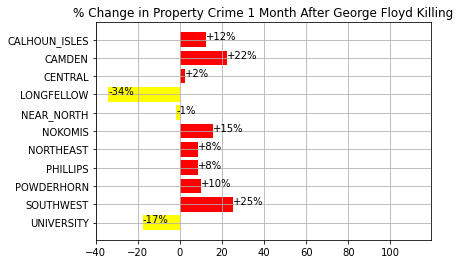

In [20]:
# % Change in Property Crime 1 Month Before and After GF  

plot_df_prop["positive"] = plot_df_prop["%_Chg"] >= 0

x = COMMUNITIES
y = plot_df_prop["%_Chg"]
z = plot_df_prop["positive"]


plt.barh(x, y, color=z.map({True: 'red', False: 'yellow'}))
 
for index, value in enumerate(y):
    the_num = f"+{str(int(value))}%" if int(value)>= 0 else f"{str(int(value))}%"
    plt.text(round(value,2), index, the_num)

# Invert y-axis

ax = plt.gca()
ax.invert_yaxis()

ax.set_xlim(-40, 119)

plt.title("% Change in Property Crime 1 Month After George Floyd Killing")
plt.grid()

plt.savefig("PercentChangeProperty.png")

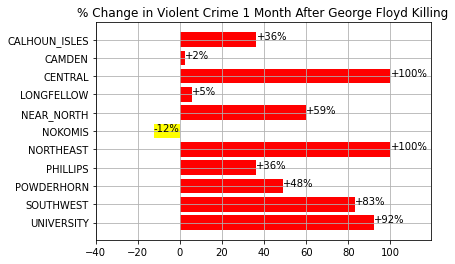

In [21]:
# % Change in Violent Crime 1 Month Before and After GF  

plot_df_viol["positive"] = plot_df_viol["%_Chg"] >= 0

x = COMMUNITIES
y = plot_df_viol["%_Chg"]
z = plot_df_viol["positive"]


plt.barh(x, y, color=z.map({True: 'red', False: 'yellow'}))
 
for index, value in enumerate(y):
    the_num = f"+{str(int(value))}%" if int(value)>= 0 else f"{str(int(value))}%"
    plt.text(round(value,2), index, the_num)

# Invert y-axis

ax = plt.gca()
ax.invert_yaxis()

ax.set_xlim(-40, 119)

plt.title("% Change in Violent Crime 1 Month After George Floyd Killing")
plt.grid()

plt.savefig("PercentChangeViolent.png")

In [22]:
# T-test for property crime before and after GF

st.ttest_ind(bp, ap, equal_var=False) 

Ttest_indResult(statistic=-0.11594176548185957, pvalue=0.9088550319514616)

In [23]:
# T-test for property crime before and after GF

st.ttest_ind(bv, av, equal_var=False) 

Ttest_indResult(statistic=-1.1424975576593623, pvalue=0.2689013645089005)

<AxesSubplot:>

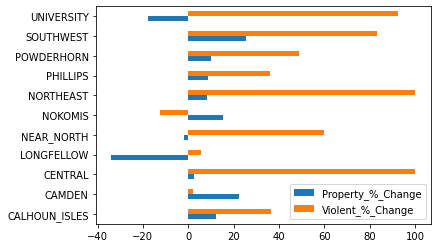

In [24]:
combo_df = pd.DataFrame(index=COMMUNITIES, \
                        data={"Property_%_Change": plot_df_prop["%_Chg"], \
                              "Violent_%_Change": plot_df_viol["%_Chg"]})

combo_df["prop_positive"] = combo_df["Property_%_Change"] >= 0
combo_df["viol_positive"] = combo_df["Violent_%_Change"] >= 0

combo_df.plot.barh()


